# Importing libraries

In [305]:
# Regular expression module allows pattern matching and manipulation of strings
import re
# Making dataframe
import pandas as pd
# Saving data into numpy array
import numpy as np
# The natrual language processing to process sentences
import nltk
# Used to display they results on a bar chart (graph)
import matplotlib.pyplot as plt
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
# Splitting our dataset into train and test
from sklearn.model_selection import train_test_split
# Get the report from evaluating models
from sklearn.metrics import classification_report, accuracy_score
# Converting text data into numerical values so that the machine can read it
from sklearn.feature_extraction.text import CountVectorizer

# Loading our train and test dataset

In [306]:
# Load the data from excel file
data = pd.read_excel('/content/Training Dataset.xlsx')

# Extract sentences and labels
sentences = data['sentence'].values
labels = data['sentiment'].values

# Split the data into training and testing sets (80% for training, 20% for testing)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, shuffle=True, test_size=0.2, random_state=230)

# Vectorize the text data using CountVectorizer
vec = CountVectorizer()                                         # Vectorizing the text
train_sentences_vectors = vec.fit_transform(train_sentences)    # Feed the training dataset to our model
test_sentences_vectors = vec.transform(test_sentences)          # Transform the test data so that the machine can perform the analysis



# Defining a function to display evaluation matrices

In [307]:
def display (report, title):
  # Extracting the evaluation matrices from Classification report
  class_names = list(report.keys())[:-3]  # columns from classification report exclude 'accuracy', 'macro avg', and 'weighted avg'

  # Plotting
  plt.figure(figsize=(12, 6))

  # Display precision, recall, f1-score
  plt.subplot(1, 2, 2)
  precision = [report[label]['precision'] for label in class_names]
  recall = [report[label]['recall'] for label in class_names]
  f1_score = [report[label]['f1-score'] for label in class_names]

  bar_width = 0.2
  index = range(len(class_names))

  # Choosing colors for bars
  colors = ['#FFB6C1', '#C0C0C0', '#120C6E']

  # Displaying each matric with diffrent color
  # Precision
  plt.bar(index, precision, width=bar_width, color=colors[0], label='Precision', edgecolor='black')
  # Recall
  plt.bar([i + bar_width for i in index], recall, width=bar_width, color=colors[1], label='Recall', edgecolor='black')
  # F1-Score
  plt.bar([i + 2 * bar_width for i in index], f1_score, width=bar_width, color=colors[2], label='F1-Score', edgecolor='black')

  # Labeling the x-axes
  plt.xlabel('Sentiment')
  plt.xticks([i + 1.5 * bar_width for i in index], class_names)
  # Naming the whole graph
  plt.title(title)
  plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy percentage
  # Mapping out the meaning of each bar
  plt.legend()

  plt.tight_layout()
  plt.show()

#Random Forest
Sentiment Analysis with Random Forest takes advantage of the Random Forest algorithm’s capabilities, an ensemble learning method, to enhance the accuracy and efficiency of sentiment classification, making it a promising approach for extracting meaningful sentiment information from large textual datasets (Yehia, 2023)

https://mlarchive.com/machine-learning/sentiment-analysis-with-random-forest/

In [308]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Initialize and train the Random Forest classifier
clf_rf = RandomForestClassifier()  # Initialize RandomForestClassifier
clf_rf.fit(train_sentences_vectors, train_labels)  # Fit the classifier on the training data

# Predict using the trained Random Forest classifier
clf_rf_pred = clf_rf.predict(test_sentences_vectors)

# Print prediction for a specific instance
print("Sample Sentence:", test_sentences[19])
print("Predicted Sentiment:", clf_rf.predict(test_sentences_vectors[19]))

# Evaluate the model using accuracy_score and Classification_report functions
print("Random Forest Accuracy:", accuracy_score(test_labels, clf_rf_pred))
print("Random Forest Classification Report:")
print(classification_report(test_labels, clf_rf_pred))



Sample Sentence: help find best number item stock suggests order product
Predicted Sentiment: ['postive']
Random Forest Accuracy: 0.6773049645390071
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.59      0.70        81
     neutral       0.55      0.96      0.70        92
     postive       0.86      0.50      0.64       109

    accuracy                           0.68       282
   macro avg       0.75      0.68      0.68       282
weighted avg       0.75      0.68      0.67       282



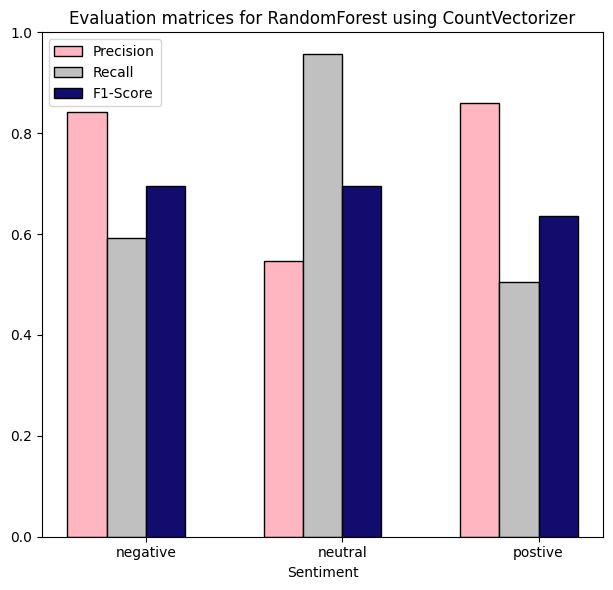

In [309]:
# Classification report for RandomForest                                        # We have to make sure that we get it in a format of a dictionary
rf_report = classification_report(test_labels, clf_rf_pred, output_dict=True)   # So that we can extract the Keys from it
rf_title = 'Evaluation matrices for RandomForest using CountVectorizer'

display(rf_report, rf_title)

#Logistic Regression

The logistic regression model learns to associate certain features (word occurrences) with a particular sentiment.The model assigns weights to different features. For example, the presence of the word “excellent” might strongly weigh towards a ‘positive’ classification (n.a, n.d).

https://makemeanalyst.com/sentiment-analysis-with-logistic-regression/

In [310]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier

# Initialize and train the Logistic Regression classifier
clf_lr = LogisticRegression()  # Initialize Logistic Regression classifier
clf_lr.fit(train_sentences_vectors, train_labels)  # Fit the classifier on the training data

# Predict using the trained Logistic Regression classifier
clf_lr_pred = clf_lr.predict(test_sentences_vectors)

# Print prediction for a specific instance
print("Sample Sentence:", test_sentences[19])
print("Predicted Sentiment:", clf_lr.predict(test_sentences_vectors[19]))

# Evaluate the model using accuracy_score and Classification_report functions
print("Logistic Regression Accuracy:", accuracy_score(test_labels, clf_lr_pred))
print("Logistic Regression Classification Report:")
print(classification_report(test_labels, clf_lr_pred))


Sample Sentence: help find best number item stock suggests order product
Predicted Sentiment: ['postive']
Logistic Regression Accuracy: 0.6666666666666666
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.73      0.70        81
     neutral       0.57      0.68      0.62        92
     postive       0.79      0.61      0.68       109

    accuracy                           0.67       282
   macro avg       0.68      0.67      0.67       282
weighted avg       0.68      0.67      0.67       282



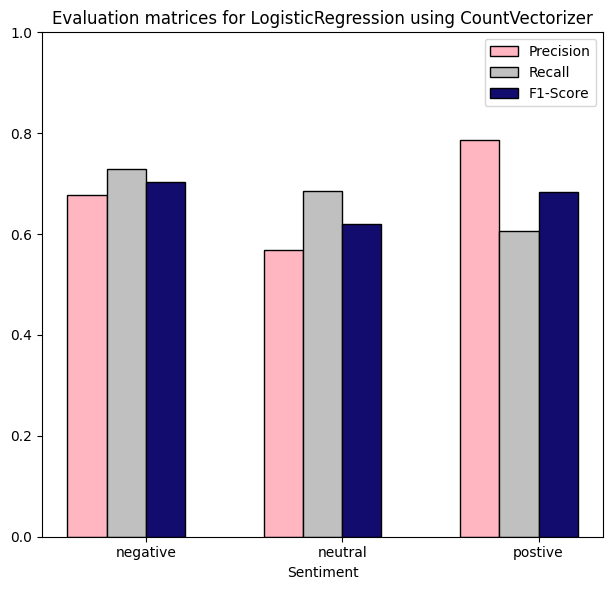

In [311]:
# Classification report for LogisticRegression
lr_report = classification_report(test_labels, clf_lr_pred, output_dict=True)
lr_title = 'Evaluation matrices for LogisticRegression using CountVectorizer'

display(lr_report, lr_title)

#Naive Bayes

"The Naive Bayes Algorithm is a classification technique based on Bayes’ Theorem. It is used to predict the class of an observation given a set of features" (Ashfaque, 2023)

https://medium.com/@zubairashfaque/sentiment-analysis-with-naive-bayes-algorithm-a31021764fb4

In [312]:
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes classifier

# Initialize and train the Naive Bayes classifier
clf_nb = MultinomialNB()  # Initialize Multinomial Naive Bayes classifier
clf_nb.fit(train_sentences_vectors, train_labels)  # Fit the classifier on the training data

# Predict using the trained Naive Bayes classifier
clf_nb_pred = clf_nb.predict(test_sentences_vectors)

# Print prediction for a specific instance
print("Sample Sentence:", test_sentences[19])
print("Predicted Sentiment:", clf_nb.predict(test_sentences_vectors[19]))

# Evaluate the model using accuracy_score and Classification_report functions
print("Naive Bayes Accuracy:", accuracy_score(test_labels, clf_nb_pred))
print("Naive Bayes Classification Report:")
print(classification_report(test_labels, clf_nb_pred))


Sample Sentence: help find best number item stock suggests order product
Predicted Sentiment: ['postive']
Naive Bayes Accuracy: 0.6453900709219859
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.75      0.68        81
     neutral       0.64      0.59      0.61        92
     postive       0.67      0.61      0.64       109

    accuracy                           0.65       282
   macro avg       0.65      0.65      0.65       282
weighted avg       0.65      0.65      0.64       282



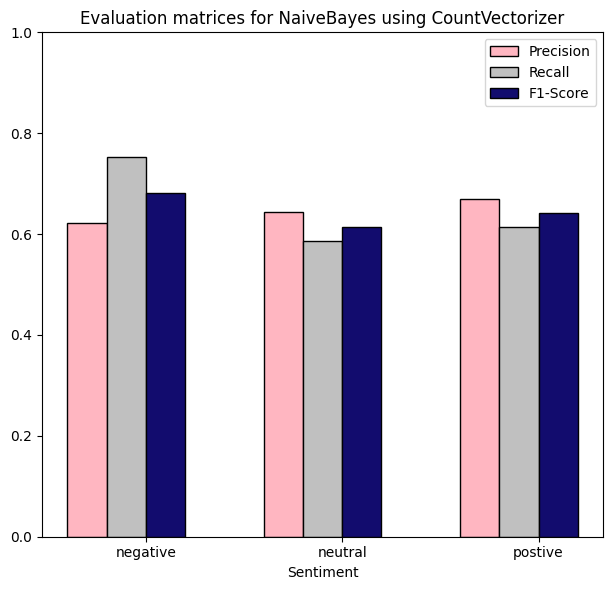

In [313]:
# Classification report for NaiveBayes
nb_report = classification_report(test_labels, clf_nb_pred, output_dict=True)
nb_title = 'Evaluation matrices for NaiveBayes using CountVectorizer'

display(nb_report, nb_title)

#Decision Tree

"A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks."(IBM n.d)

https://www.ibm.com/topics/decision-trees

In [314]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
clf_dt = DecisionTreeClassifier()  # Initialize DecisionTreeClassifier
clf_dt.fit(train_sentences_vectors, train_labels)  # Fit the classifier on the training data

# Predict using the trained Decision Tree classifier
clf_dt_pred = clf_dt.predict(test_sentences_vectors)

# Print prediction for a specific instance
print("Sample Sentence:", test_sentences[19])
print("Predicted Sentiment:", clf_dt.predict(test_sentences_vectors[19]))

# Evaluate the model using accuracy_score and Classification_report functions
print("Decision Tree Accuracy:", accuracy_score(test_labels, clf_dt_pred))
print("Decision Tree Classification Report:")
print(classification_report(test_labels, clf_dt_pred))


Sample Sentence: help find best number item stock suggests order product
Predicted Sentiment: ['postive']
Decision Tree Accuracy: 0.6702127659574468
Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.59      0.64        81
     neutral       0.60      0.78      0.68        92
     postive       0.74      0.63      0.68       109

    accuracy                           0.67       282
   macro avg       0.68      0.67      0.67       282
weighted avg       0.68      0.67      0.67       282



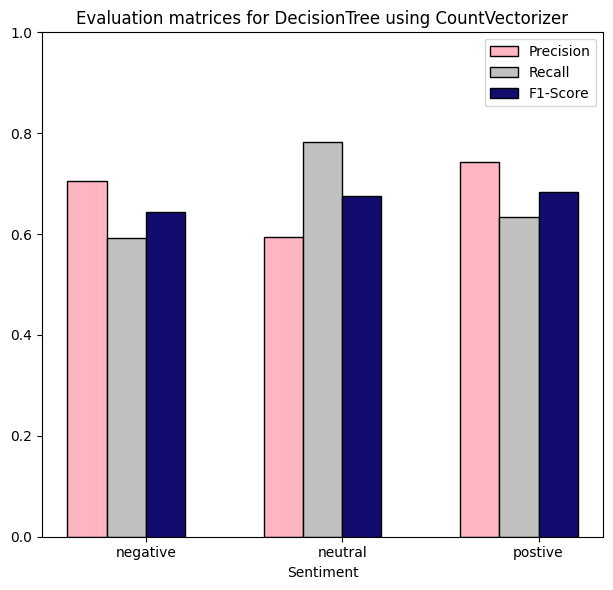

In [315]:
# Classification report for DecisionTree
dt_report = classification_report(test_labels, clf_dt_pred, output_dict=True)
dt_title = 'Evaluation matrices for DecisionTree using CountVectorizer'

display(dt_report, dt_title)

# Comparing the accuracy and for each model

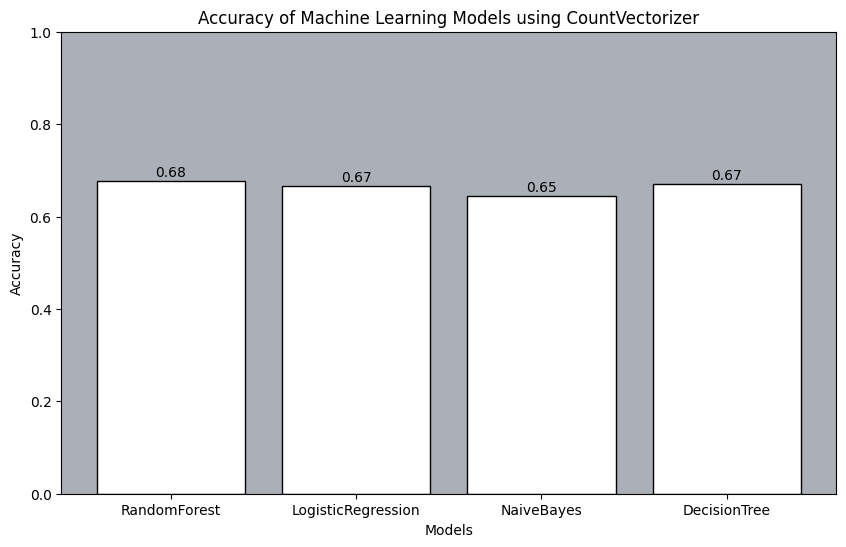

In [316]:
# Plotting the accuracy of each model in one bar chart

# Calculating the accuracy
rf_accuracy =  accuracy_score(test_labels, clf_rf_pred)
lr_accuracy =  accuracy_score(test_labels, clf_lr_pred)
nb_accuracy =  accuracy_score(test_labels, clf_nb_pred)
dt_accuracy =  accuracy_score(test_labels, clf_dt_pred)

# Model names
models = ['RandomForest', 'LogisticRegression', 'NaiveBayes', 'DecisionTree']

# Accuracy values
accuracies = [rf_accuracy, lr_accuracy, nb_accuracy, dt_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust how big we want our graph to be
plt.bar(models, accuracies, color='white', edgecolor='black')
# Setting the background color to gray
plt.gca().set_facecolor('#ABB0B8')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models using CountVectorizer')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy percentage

# Displaying the accuracy values on each bar
for i, acc in enumerate(accuracies):
    plt.text(models[i], acc + 0.01, f'{acc:.2f}', ha='center')

# Display the plot
plt.show()
